<a href="https://colab.research.google.com/github/RCutrino/MLPNS_RCutrino/blob/main/Esercizio_16_03_MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function, division #compatibilty python 3 to python 2
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl #plotting
%pylab inline 
#not needed in colab
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution) with 3 degrees of freedom, and with a scale parameter corresponding to the temperature in some way. 


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

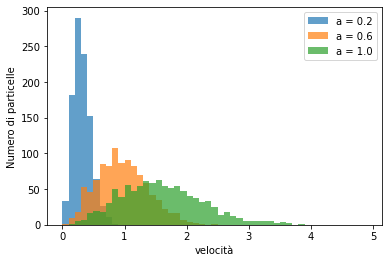

In [2]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1), alpha=0.7,
       label="a = %.1f"%a);

pl.legend();
pl.xlabel("velocità");
pl.ylabel("Numero di particelle");


In [3]:
sp.stats.chi.rvs(df=3, scale=1.0, size=1000).mean()

1.5851794133310686

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**? 

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)
 

Your answer here: 
**$a \propto \sqrt{T}$**
```
# Questo è formattato come codice
```




# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed? 
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()```  calculate the gamma $\Gamma$ function,

**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**

In [4]:
def chi_mean(a, k=3):
  """
  Input:
  a: (float of int) scaling parameter of MB distribution
  k: degree of freedom of chi distribution
  """
  gamma=sp.special.gamma
  return a * (np.sqrt(2) * gamma(( k + 1 ) * 0.5) / gamma( k * 0.5))


In [5]:
# if you use the definition of the mean for the generic chi2 distribution
def mean(k, a):
  """ mean of the chi2 distribution
  Input: 
  k: number of degrees of freedom of the distribution
  a: maxwell parameter"""
  return np.sqrt(2) * sp.special.gamma((k+1)/2) / sp.special.gamma(k/2) * a
# if you use the definition of the mean for the Maxwell-Boltzmann distribution
def meanMB(a):
  """ mean of the chi2 distribution
  Input: 
  a: maxwell parameter"""
  return 2 * a * np.sqrt(2/np.pi)

for a in 0.2, 0.6, 1:
    print("the mean of distribution (chi2) with a={:.1f} is {:.1f}".format(a, 
                                                          mean(3, a)))
    
    print("the mean of distribution (MB) with a={:.1f} is {:.1f}".format(a, 
                                                          meanMB(a)))
    
print("""The peak represents the most probable speed (mode).  + 
      The distribution is longer tailed on the right so the mean is to the right of the peak, 
      which is the most probable speed """)

# if this was an exam:
# more than 2 significant digits gets 10% less points
# just printing the values and not saying which a they correspond to gets 50% of the points
# creating a funciont like i did above does not get extra points but should be commented and good

the mean of distribution (chi2) with a=0.2 is 0.3
the mean of distribution (MB) with a=0.2 is 0.3
the mean of distribution (chi2) with a=0.6 is 1.0
the mean of distribution (MB) with a=0.6 is 1.0
the mean of distribution (chi2) with a=1.0 is 1.6
the mean of distribution (MB) with a=1.0 is 1.6
The peak represents the most probable speed (mode).  + 
      The distribution is longer tailed on the right so the mean is to the right of the peak, 
      which is the most probable speed 


This really only holds for perfect gasses, which means under 4 assumptions: 
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [6]:
# your code here